In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/SDS-TA-Materials/Datathon-Questions-2024/Q2-Salary-Analysis/salary_analysis.csv')
df

,Timestamp,Age,DOB,Industry,Job title,Additional context,Annual salary,Additional monetary compensation,Currency,Country,City,Years of professional work experience overall,Highest level of education completed,Gender
0,4/27/2021 11:02:10,47,20-11-1976,Education (Higher Education),Research and Instruction Librarian,NaN,$55000,0.0,USD,United States,Boston,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,43,18-05-1981,Computing or Tech,Change & Internal Communications Manager,NaN,NaN,4000.0,GBP,United Kingdom,Cambridge,8 - 10 years,College degree,Non-binary
2,4/27/2021 11:02:38,49,02-07-1975,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,usd,US,Chattanooga,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,47,15-07-1977,Nonprofits,Program Manager,NaN,$62000,3000.0,usd,USA,Milwaukee,8 - 10 years,College degree,Woman
4,4/27/2021 11:02:42,43,04-07-1981,NaN,Accounting Manager,NaN,$60000,7000.0,USD,US,Greenville,8 - 10 years,College degree,Woman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28081,9/25/2024 21:34:43,49,21-09-1975,Education (Primary/Secondary),Curriculum Writer,I am a freelance contract curriculum writer fo...,$70000,0.0,usd,United States,Bennettsville,21 - 30 years,Master's degree,Woman
28082,9/30/2024 10:52:30,41,14-12-1982,Government and Public Administration,Clerical Officer,NaN,$28600,NaN,EUR,Ireland,Dublin,21 - 30 years,"Professional degree (MD, JD, etc.)",Man
28083,10-04-2024 13:05,45,03-10-1979,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160,0.0,USD,United States,Jhonston,1 year or less,College degree,Man
28084,10-07-2024 05:17,47,10-12-1976,Social networks,Content creator,NaN,$2000000,NaN,USD,Taiwan,Milwaukee,41 years or more,PhD,Non-binary


In [3]:
df.columns

Index(['Timestamp', 'Age', 'DOB', 'Industry', 'Job title',
       'Additional context', 'Annual salary',
       'Additional monetary compensation', 'Currency', 'Country', 'City',
       'Years of professional work experience overall',
       'Highest level of education completed', 'Gender'],
      dtype='object')

In [4]:
df.dtypes

Timestamp                                         object
Age                                                int64
DOB                                               object
Industry                                          object
Job title                                         object
Additional context                                object
Annual salary                                     object
Additional monetary compensation                 float64
Currency                                          object
Country                                           object
City                                              object
Years of professional work experience overall     object
Highest level of education completed              object
Gender                                            object
dtype: object

In [5]:
# 1)

# Classification of Salary Dataset columns by data type
data_types = {
    'Timestamp': 'Nominal', #unique, no inherent order or being measurable
    'Age': 'Ratio',
    'DOB': 'Interval', #no meaningful zero(0 AD doesn't mean date doesn't exist), measurable between dates
    'Industry': 'Nominal', 
    'Job title': 'Nominal',
    'Additional context': 'Nominal',
    'Annual salary': 'Ratio',
    'Additional monetary compensation': 'Ratio',
    'Currency': 'Nominal',
    'Country': 'Nominal',
    'City': 'Nominal',
    'Years of professional work experience overall': 'Interval', #shown as ranges
    'Highest level of education completed': 'Ordinal', #education levels ordered in ranking
    'Gender': 'Nominal'
}

# Displaying the data type classifications
data_types


{'Timestamp': 'Nominal',
 'Age': 'Ratio',
 'DOB': 'Interval',
 'Industry': 'Nominal',
 'Job title': 'Nominal',
 'Additional context': 'Nominal',
 'Annual salary': 'Ratio',
 'Additional monetary compensation': 'Ratio',
 'Currency': 'Nominal',
 'Country': 'Nominal',
 'City': 'Nominal',
 'Years of professional work experience overall': 'Interval',
 'Highest level of education completed': 'Ordinal',
 'Gender': 'Nominal'}

In [6]:
# 2) Preprocessing stage

In [7]:
df.isnull().sum()

Timestamp                                            0
Age                                                  0
DOB                                               1441
Industry                                            90
Job title                                            1
Additional context                               20819
Annual salary                                     2832
Additional monetary compensation                  7306
Currency                                             0
Country                                              0
City                                                82
Years of professional work experience overall        0
Highest level of education completed               222
Gender                                             177
dtype: int64

In [8]:
#for Timestamp column
df['Timestamp']

0         4/27/2021 11:02:10
1         4/27/2021 11:02:22
2         4/27/2021 11:02:38
3         4/27/2021 11:02:41
4         4/27/2021 11:02:42
                ...         
28081     9/25/2024 21:34:43
28082     9/30/2024 10:52:30
28083       10-04-2024 13:05
28084       10-07-2024 05:17
28085    10/28/2024 17:33:38
Name: Timestamp, Length: 28086, dtype: object

In [9]:
import pandas as pd
from datetime import datetime

# Function to convert timestamps to 'MM-DD-YYYY HH:MM:SS' format and ensure datetime type
def convert_to_datetime(timestamp):
    # Replace '/' with '-' for consistency
    timestamp = timestamp.replace('/', '-')
    
    # Try parsing both 'MM-DD-YYYY HH:MM:SS' and 'MM-DD-YYYY HH:MM' formats
    try:
        # Attempt 'MM-DD-YYYY HH:MM:SS' format first
        dt = datetime.strptime(timestamp, '%m-%d-%Y %H:%M:%S')
    except ValueError:
        try:
            # If that fails, try 'MM-DD-YYYY HH:MM' and add seconds
            dt = datetime.strptime(timestamp, '%m-%d-%Y %H:%M')
        except ValueError:
            # If parsing fails, return NaT for invalid entries
            return pd.NaT
    return dt  # Return datetime object if conversion succeeds

# Apply the conversion function to each row in 'Timestamp' column
df['Timestamp'] = df['Timestamp'].apply(convert_to_datetime)

# Check for any rows that couldn't be converted and are now NaT
invalid_timestamps = df[df['Timestamp'].isna()]

In [10]:
# Display rows with invalid 'Timestamp' entries, if any
print("Rows not following 'MM-DD-YYYY HH:MM[:SS]' format in 'Timestamp':")
invalid_timestamps[['Timestamp']] #Timestamp standardised


Rows not following 'MM-DD-YYYY HH:MM[:SS]' format in 'Timestamp':


,Timestamp


In [11]:
print(df['Timestamp'].isna().sum(), df['Timestamp'].isnull().sum()) #Timestamp cleaned

0 0


In [12]:
# for 'DOB' column
df['DOB']

0        20-11-1976
1        18-05-1981
2        02-07-1975
3        15-07-1977
4        04-07-1981
            ...    
28081    21-09-1975
28082    14-12-1982
28083    03-10-1979
28084    10-12-1976
28085    03-04-1971
Name: DOB, Length: 28086, dtype: object

In [13]:
import pandas as pd
from datetime import datetime

# Sample DataFrame setup
# df = pd.DataFrame({"DOB": ["15-08-2000", "2022/12/05", "12-31-1995", "29-02-2001", None, "13-13-2020"]})

# Function to standardize and validate DOB format to 'dd-mm-yyyy'
def standardize_dob(dob):
    # Return NaT if dob is missing
    if pd.isna(dob):
        return pd.NaT
    
    # Replace '/' with '-' for consistency
    dob = dob.replace('/', '-')
    
    # Try parsing in 'dd-mm-yyyy' format
    try:
        # First, try parsing in 'dd-mm-yyyy' format
        dt = datetime.strptime(dob, '%d-%m-%Y')
    except ValueError:
        try:
            # Try parsing 'mm-dd-yyyy' or other formats if necessary
            dt = datetime.strptime(dob, '%m-%d-%Y')
        except ValueError:
            # If parsing fails, return NaT for invalid entries
            return pd.NaT

    # Return the standardized datetime object
    return dt

# Apply the standardization function to the DOB column
df['DOB'] = df['DOB'].apply(standardize_dob)

In [14]:
# Display rows with missing or invalid DOB entries
invalid_dobs = df[df['DOB'].isna()]
print("Rows with missing or invalid 'DOB' entries:")
invalid_dobs[['DOB']]

Rows with missing or invalid 'DOB' entries:


,DOB
18,NaT
58,NaT
69,NaT
116,NaT
134,NaT
...,...
28014,NaT
28051,NaT
28067,NaT
28070,NaT


In [15]:
# replace NaT with '1900-01-01' for missing DOBs, as dropping 1442 rows against 28085 rows is significant loss
df['DOB'].fillna(pd.Timestamp('1900-01-01'), inplace=True) #DOB standardised

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_66618/2773041664.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DOB'].fillna(pd.Timestamp('1900-01-01'), inplace=True) #DOB standardised


In [16]:
print(df['DOB'].isna().sum(), df['DOB'].isnull().sum()) #DOB cleaned

0 0


In [17]:
# Age has an issue : difference between timestamp and DOB is not consistent with given age, and some ages are greater than 100

In [18]:
# Define a function to calculate age based on DOB and Timestamp
def calculate_age_based_on_timestamp(row):
    if pd.notnull(row['DOB']) and pd.notnull(row['Timestamp']):
        return ((row['Timestamp'] - row['DOB']).days // 365) + 1
    return None  # For invalid DOB or Timestamp

# Calculate age based on the difference and store it
Calculated_age = df.apply(calculate_age_based_on_timestamp, axis=1)

# Update the original DataFrame with the calculated ages
df['Age'] = Calculated_age

# Set Age to 0 where DOB is '1900-01-01'
df.loc[df['DOB'] == pd.to_datetime('1900-01-01'), 'Age'] = df['Age'].median()

# Handle out-of-bounds ages: set implausible ages (greater than 100 or less than 0) to NaN
df.loc[(df['Age'] > 100) | (df['Age'] < 0), 'Age'] = df['Age'].median()  # or you can use df.loc[(df['Age'] > 100) | (df['Age'] < 0), 'Age'] = 0

In [19]:

age_out_of_bounds = df[(df['Age'] > 100) | (df['Age'] < 0)]
age_out_of_bounds #Age cleaned

,Timestamp,Age,DOB,Industry,Job title,Additional context,Annual salary,Additional monetary compensation,Currency,Country,City,Years of professional work experience overall,Highest level of education completed,Gender


In [20]:
# Annual Salary to be made an integer

df['Annual salary'] = df['Annual salary'].replace('[\$,]', '', regex=True).astype(float)
df['Annual salary']

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_66618/2648124474.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Annual salary'] = df['Annual salary'].replace('[\$,]', '', regex=True).astype(float)


0          55000.0
1              NaN
2          34000.0
3          62000.0
4          60000.0
           ...    
28081      70000.0
28082      28600.0
28083      56160.0
28084    2000000.0
28085     109000.0
Name: Annual salary, Length: 28086, dtype: float64

In [21]:
df['Annual salary'].isnull().sum() #can be either imputed or filled with 0 

2832

In [22]:
df['Annual salary'].fillna(df['Annual salary'].median(), inplace=True)

In [23]:
df['Annual salary'].isnull().sum() #Annual salary cleaned

0

In [24]:
df['Additional monetary compensation'].isnull().sum() #can be either imputed or filled with 0 

7306

In [25]:
df['Additional monetary compensation'].fillna(df['Additional monetary compensation'].median(), inplace=True)

/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_66618/2901081658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Additional monetary compensation'].fillna(df['Additional monetary compensation'].median(), inplace=True)


In [26]:
df['Additional monetary compensation'].isnull().sum()  #Additional monetary compensation cleaned

0

In [27]:
df.isnull().sum()

Timestamp                                            0
Age                                                  0
DOB                                                  0
Industry                                            90
Job title                                            1
Additional context                               20819
Annual salary                                        0
Additional monetary compensation                     0
Currency                                             0
Country                                              0
City                                                82
Years of professional work experience overall        0
Highest level of education completed               222
Gender                                             177
dtype: int64

In [28]:
# Impute categorical variables with the mode (most frequent value)
df['Industry'].fillna(df['Industry'].mode()[0], inplace=True)
df['Job title'].fillna(df['Job title'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Highest level of education completed'].fillna(df['Highest level of education completed'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_66618/3901687747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Industry'].fillna(df['Industry'].mode()[0], inplace=True)
/var/folders/4p/86fqrsqj6z36dr_23z25gf8m0000gn/T/ipykernel_66618/3901687747.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [29]:
df.isnull().sum()

Timestamp                                            0
Age                                                  0
DOB                                                  0
Industry                                             0
Job title                                            0
Additional context                               20819
Annual salary                                        0
Additional monetary compensation                     0
Currency                                             0
Country                                              0
City                                                 0
Years of professional work experience overall        0
Highest level of education completed                 0
Gender                                               0
dtype: int64

In [30]:
df['Additional context'].unique()

array([nan, 'High school, FT', 'Data developer/ETL Developer', ...,
       'Retail Pharmacy',
       'I am a freelance contract curriculum writer for computer science and STEM companies.',
       'I was an Intern'], dtype=object)

In [31]:
'''since Additional context has no real meaning to our further analysis, better to drop it'''
df.drop(columns=['Additional context'], inplace=True)

In [32]:
df

,Timestamp,Age,DOB,Industry,Job title,Annual salary,Additional monetary compensation,Currency,Country,City,Years of professional work experience overall,Highest level of education completed,Gender
0,2021-04-27 11:02:10,45,1976-11-20,Education (Higher Education),Research and Instruction Librarian,55000.0,0.0,USD,United States,Boston,5-7 years,Master's degree,Woman
1,2021-04-27 11:02:22,40,1981-05-18,Computing or Tech,Change & Internal Communications Manager,75000.0,4000.0,GBP,United Kingdom,Cambridge,8 - 10 years,College degree,Non-binary
2,2021-04-27 11:02:38,46,1975-07-02,"Accounting, Banking & Finance",Marketing Specialist,34000.0,2000.0,usd,US,Chattanooga,2 - 4 years,College degree,Woman
3,2021-04-27 11:02:41,44,1977-07-15,Nonprofits,Program Manager,62000.0,3000.0,usd,USA,Milwaukee,8 - 10 years,College degree,Woman
4,2021-04-27 11:02:42,40,1981-07-04,Computing or Tech,Accounting Manager,60000.0,7000.0,USD,US,Greenville,8 - 10 years,College degree,Woman
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28081,2024-09-25 21:34:43,50,1975-09-21,Education (Primary/Secondary),Curriculum Writer,70000.0,0.0,usd,United States,Bennettsville,21 - 30 years,Master's degree,Woman
28082,2024-09-30 10:52:30,42,1982-12-14,Government and Public Administration,Clerical Officer,28600.0,2000.0,EUR,Ireland,Dublin,21 - 30 years,"Professional degree (MD, JD, etc.)",Man
28083,2024-10-04 13:05:00,46,1979-10-03,Computing or Tech,Software Engineering Co-Op,56160.0,0.0,USD,United States,Jhonston,1 year or less,College degree,Man
28084,2024-10-07 05:17:00,48,1976-12-10,Social networks,Content creator,2000000.0,2000.0,USD,Taiwan,Milwaukee,41 years or more,PhD,Non-binary


In [33]:
df.isnull().sum()

Timestamp                                        0
Age                                              0
DOB                                              0
Industry                                         0
Job title                                        0
Annual salary                                    0
Additional monetary compensation                 0
Currency                                         0
Country                                          0
City                                             0
Years of professional work experience overall    0
Highest level of education completed             0
Gender                                           0
dtype: int64

In [34]:
df.duplicated().sum() #no duplicates hence completely preprocessed

0

In [35]:
df.dtypes

Timestamp                                        datetime64[ns]
Age                                                       int64
DOB                                              datetime64[ns]
Industry                                                 object
Job title                                                object
Annual salary                                           float64
Additional monetary compensation                        float64
Currency                                                 object
Country                                                  object
City                                                     object
Years of professional work experience overall            object
Highest level of education completed                     object
Gender                                                   object
dtype: object

In [36]:
# 3
numerical_cols_stats = df[['Age', 'Annual salary', 'Additional monetary compensation']].describe()
numerical_cols_stats

,Age,Annual salary,Additional monetary compensation
count,28086.000000,2.808600e+04,2.808600e+04
mean,43.278181,3.576449e+05,1.395144e+04
std,4.335911,3.620671e+07,7.172057e+05
min,0.000000,0.000000e+00,0.000000e+00
25%,40.000000,5.600000e+04,0.000000e+00
50%,43.000000,7.500000e+04,2.000000e+03
75%,47.000000,1.035875e+05,5.000000e+03
max,54.000000,6.000070e+09,1.200000e+08


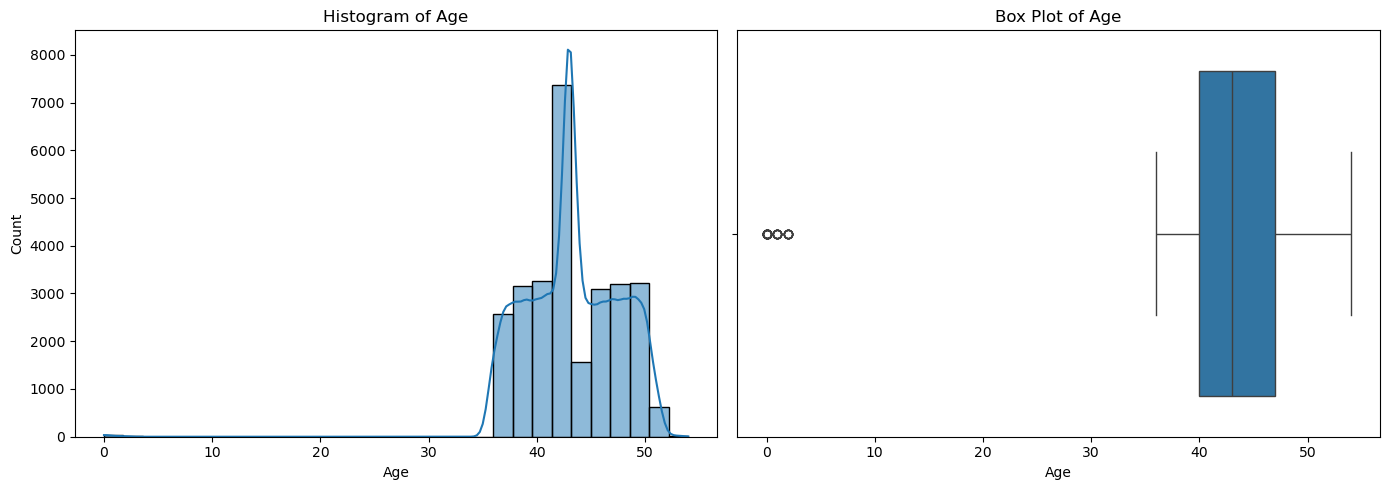

In [37]:
# 4) 
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for 'Age'
sns.histplot(df['Age'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Age')

# Box plot for 'Age'
sns.boxplot(x=df['Age'].dropna(), ax=axes[1])
axes[1].set_title('Box Plot of Age')

# Show the plots
plt.tight_layout()
plt.show()

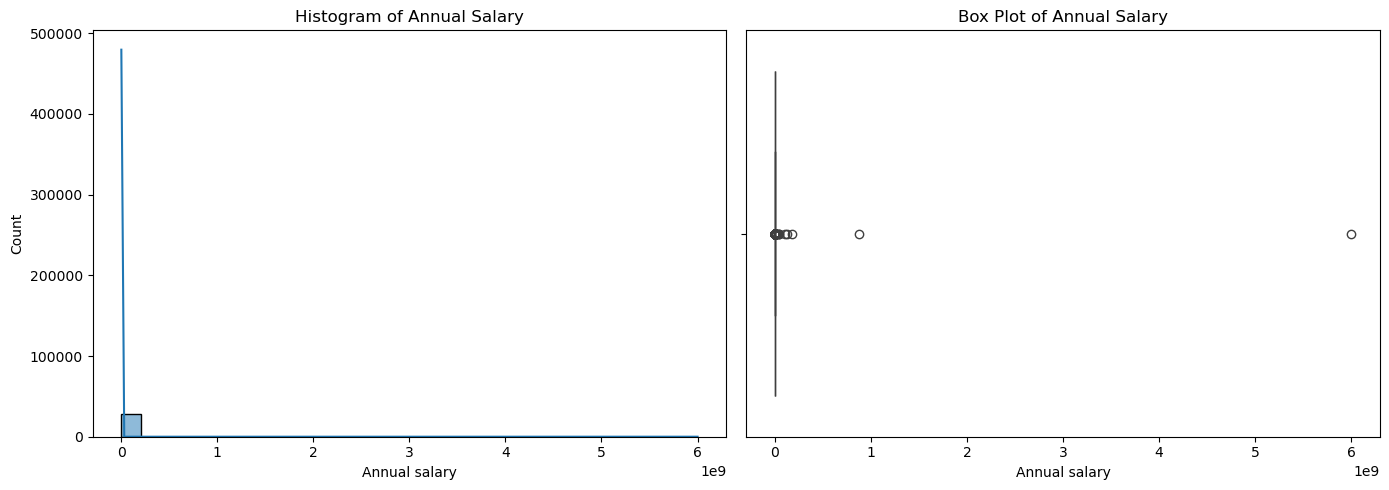

In [38]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for 'Annual salary'
sns.histplot(df['Annual salary'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Annual Salary')

# Box plot for 'Annual salary'
sns.boxplot(x=df['Annual salary'].dropna(), ax=axes[1])
axes[1].set_title('Box Plot of Annual Salary')

# Show the plots
plt.tight_layout()
plt.show()


In [39]:
'''
4) i) Age follows normal distribution whereas Annual salary doesn't follow normal distribution, 
it follows right skewed / log distribution
'''

"\n4) i) Age follows normal distribution whereas Annual salary doesn't follow normal distribution, \nit follows right skewed / log distribution\n"

In [40]:
# 4) ii)
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column < lower_bound) | (column > upper_bound)).sum()

# Calculate outliers for 'Age' and 'Annual salary'
age_outliers_count = count_outliers(df['Age'])
annual_salary_outliers_count = count_outliers(df['Annual salary'])

print(f'Number of outliers in Age: {age_outliers_count}')
print(f'Number of outliers in Annual Salary: {annual_salary_outliers_count}')


Number of outliers in Age: 40
Number of outliers in Annual Salary: 1615


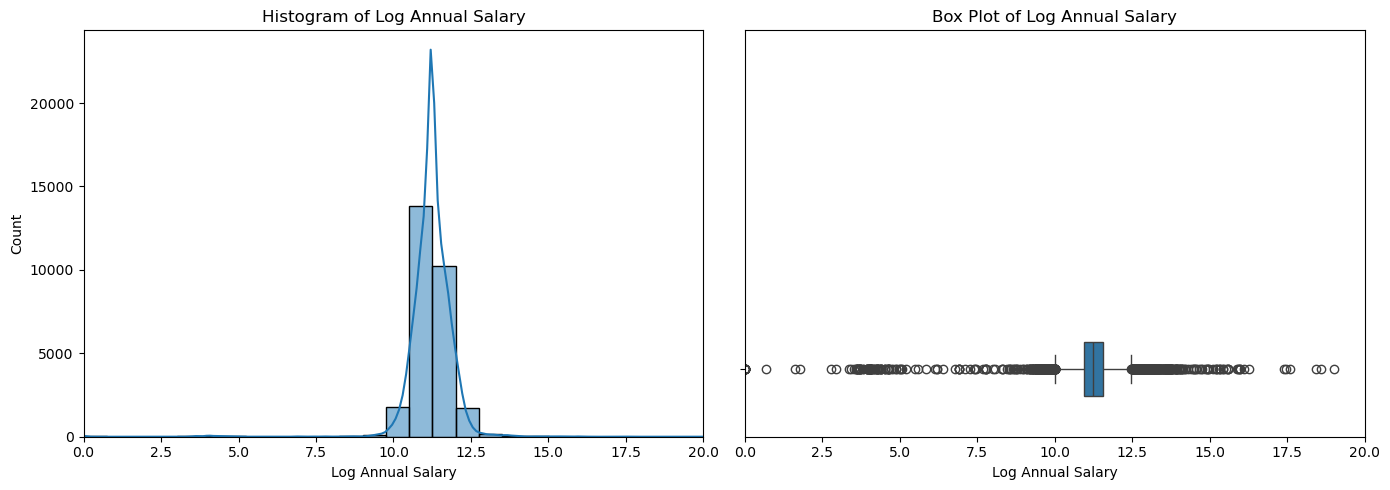

In [41]:
# since Annual salary follows log distribution, we can log transform it and replot to get histogram and box plot

# Log-transform the 'Annual salary' for better visualization
df['Log Annual Salary'] = np.log1p(df['Annual salary'].dropna())  # log1p handles log(0) by using log(1+x)

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for 'Log Annual Salary'
sns.histplot(df['Log Annual Salary'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Log Annual Salary')

# Limit x and y axis for histogram
axes[0].set_xlim(0, 20)  # Set x-axis limits after log transformation
#axes[0].set_ylim(0, 1500)  # Set y-axis limits

# Box plot for 'Log Annual Salary'
sns.boxplot(x=df['Log Annual Salary'], ax=axes[1])
axes[1].set_title('Box Plot of Log Annual Salary')

# Limit x and y axis for box plot
axes[1].set_xlim(0, 20)  # Set x-axis limits
axes[1].set_ylim(-1, 5)  # Adjust y-axis limits to capture the box and whiskers

# Show the plots
plt.tight_layout()
plt.show()


In [42]:
# 5) ideal would be to use capping at 95th percentile 

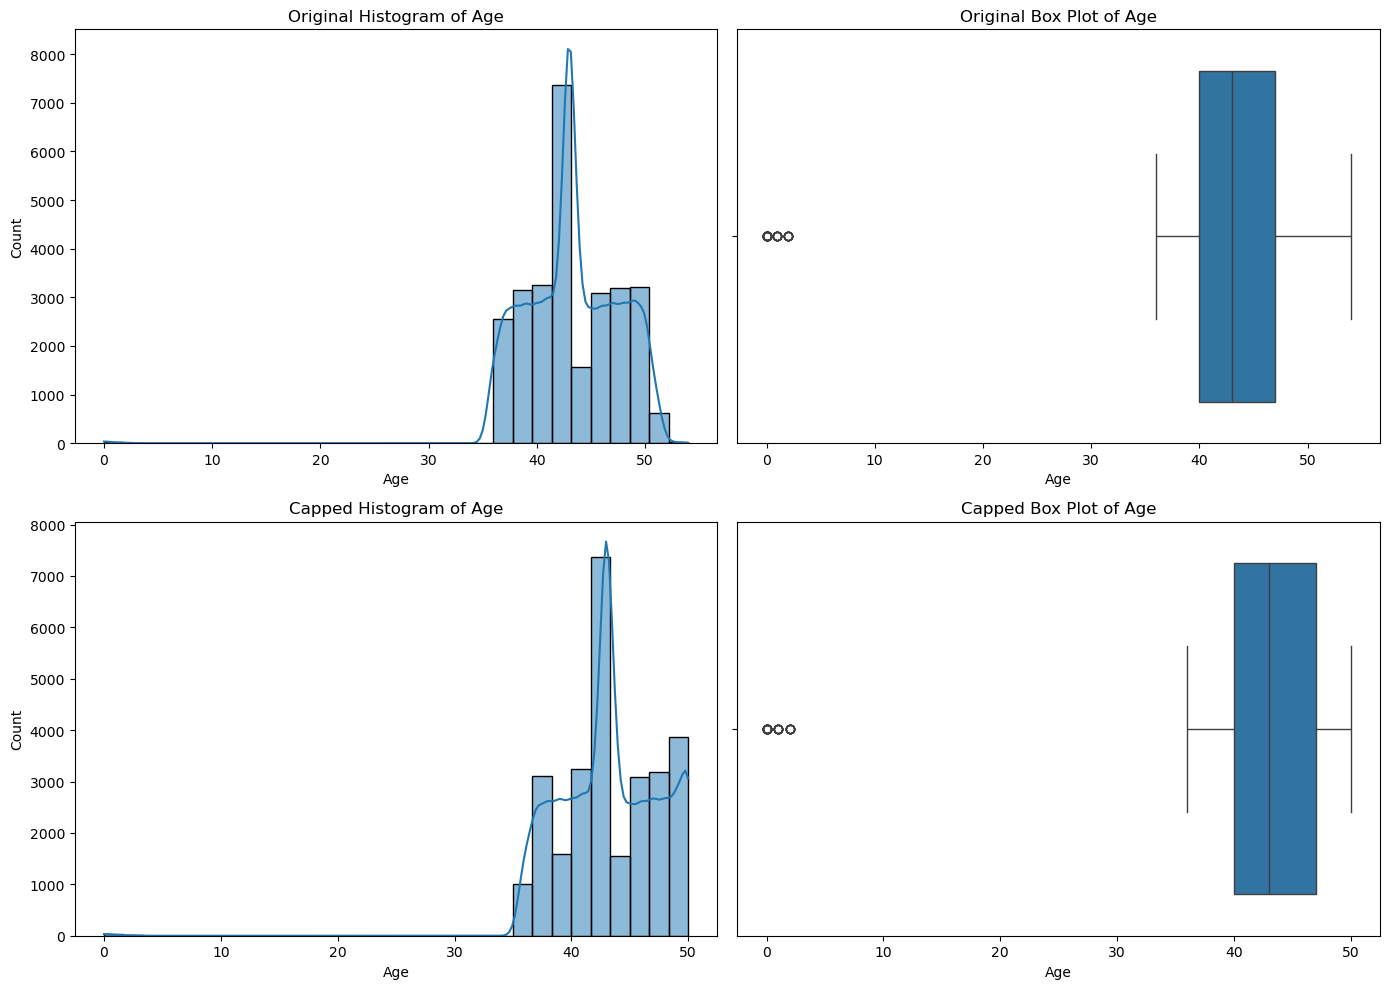

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to cap outliers
def cap_outliers(df, column, percentile=95):
    cap_value = df[column].quantile(percentile / 100)
    df[column] = df[column].clip(upper=cap_value)
    return df

# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create copies of the original DataFrame for capping and removing outliers
df_capped = df.copy()

# Cap outliers in 'Age' and 'Annual Salary'
df_capped = cap_outliers(df_capped, 'Age', percentile=95)
df_capped = cap_outliers(df_capped, 'Annual salary', percentile=95)

# Visualization with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Age Histogram and Boxplot
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Histogram of Age')
sns.boxplot(x=df['Age'], ax=axes[0, 1])
axes[0, 1].set_title('Original Box Plot of Age')

# Capped Age Histogram and Boxplot
sns.histplot(df_capped['Age'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Capped Histogram of Age')
sns.boxplot(x=df_capped['Age'], ax=axes[1, 1])
axes[1, 1].set_title('Capped Box Plot of Age')

plt.tight_layout()
plt.show()


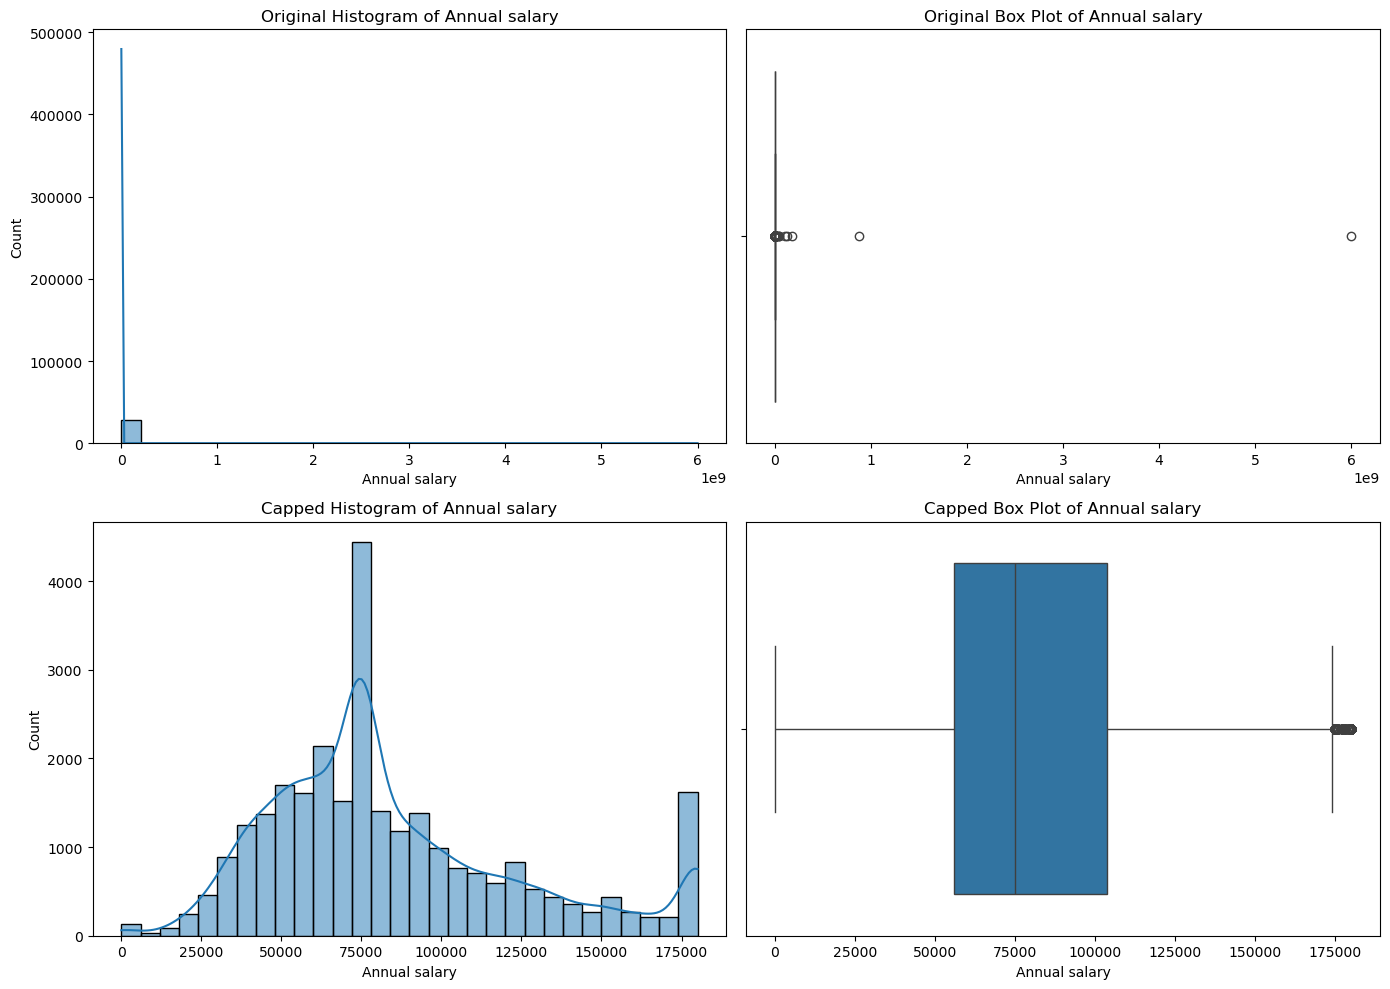

In [44]:
# Visualization with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Annual salary Histogram and Boxplot
sns.histplot(df['Annual salary'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Original Histogram of Annual salary')
sns.boxplot(x=df['Annual salary'], ax=axes[0, 1])
axes[0, 1].set_title('Original Box Plot of Annual salary')

# Capped Annual salary Histogram and Boxplot
sns.histplot(df_capped['Annual salary'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Capped Histogram of Annual salary')
sns.boxplot(x=df_capped['Annual salary'], ax=axes[1, 1])
axes[1, 1].set_title('Capped Box Plot of Annual salary')

plt.tight_layout()
plt.show()

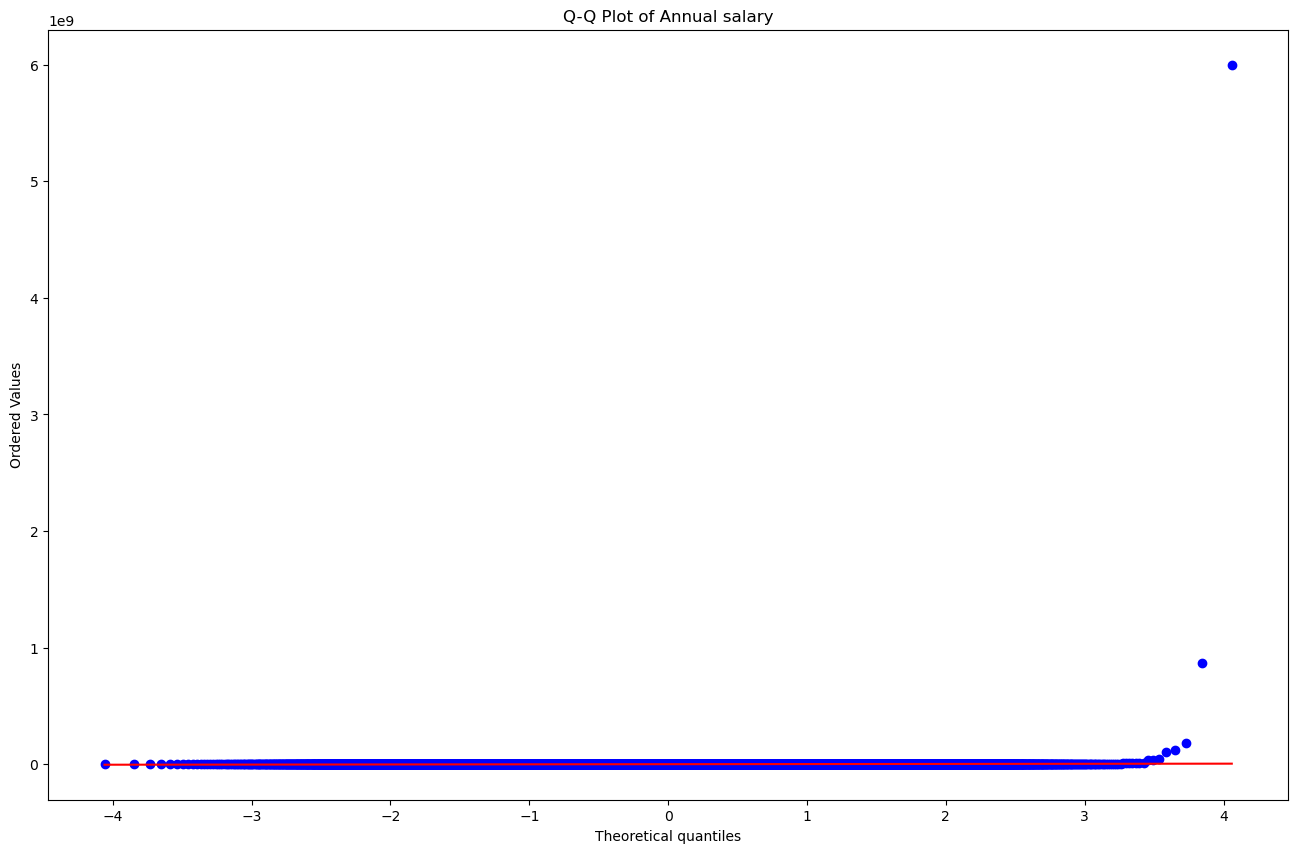

In [45]:
# 6

# A Q-Q plot can help evaluate if Annual salary follows a normal distribution.
# If the data points roughly follow a straight line, then Annual salary is likely normally distributed.
# Deviations suggest skewness or other non-normal characteristics.

import scipy.stats as stats

# Q-Q Plot for 'Annual salary'
plt.figure(figsize=(16, 10))
stats.probplot(df['Annual salary'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Annual salary")
plt.show()


In [46]:
# => clearly, Annual salary does not follow normal distribution due to its extreme skewness (right skewed)

In [47]:
# optional 
df['Annual salary'].skew() #indicates very high right skewness

162.52446557050592

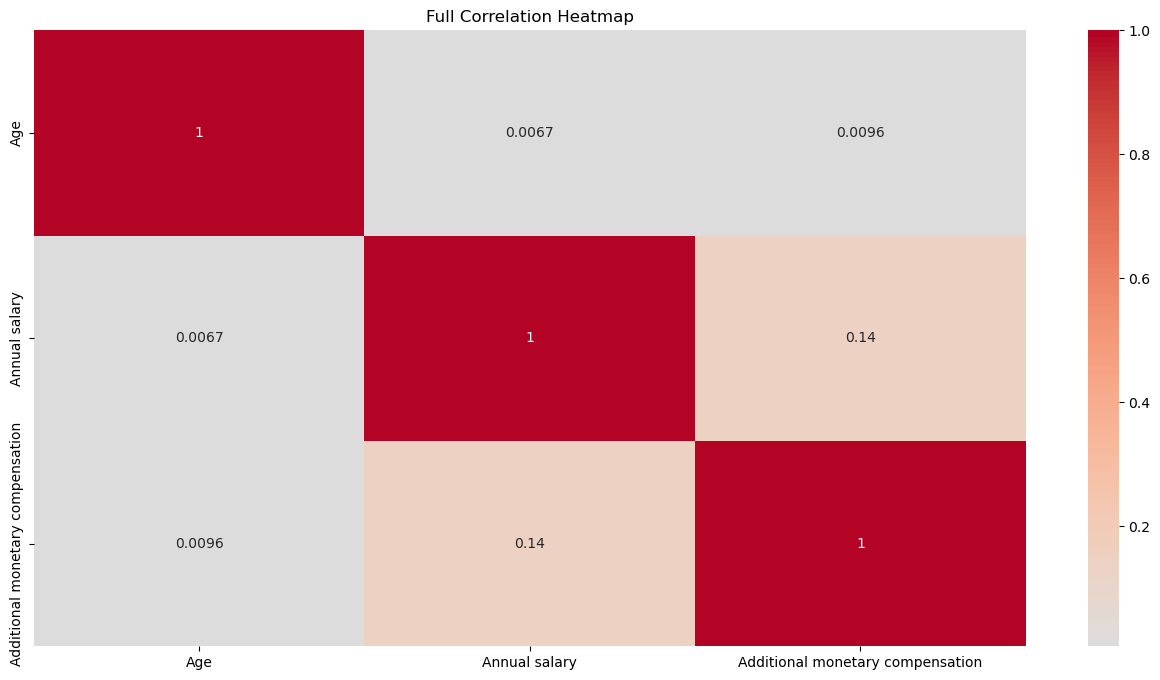

In [48]:
# 7

# Correlation calculation for Age with other numerical variables
correlations = df[['Age', 'Annual salary', 'Additional monetary compensation']].corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)
plt.title("Full Correlation Heatmap")
plt.show()


In [49]:
# => Annual salary has highest correlation with Additional monetary compensation

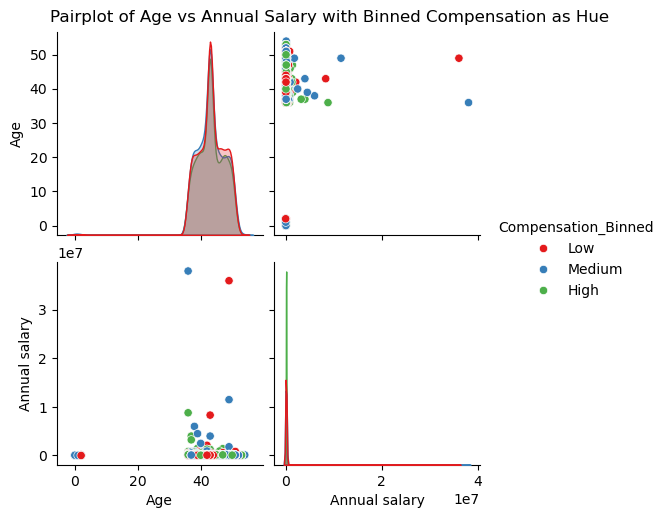

In [50]:
# Sample 10000 rows
sampled_df = df.sample(n=10000, random_state=42)

# Create bins for 'Additional monetary compensation'
sampled_df['Compensation_Binned'] = pd.qcut(sampled_df['Additional monetary compensation'], q=3, labels=["Low", "Medium", "High"])

# Generate the pairplot with the binned compensation
sns.pairplot(sampled_df, vars=['Age', 'Annual salary'], hue='Compensation_Binned', palette="Set1")
plt.suptitle("Pairplot of Age vs Annual Salary with Binned Compensation as Hue", y=1.02)
plt.show()

In [51]:
# All visualizations till now provide insights on:

# Outliers: Adjusted with capping, making distributions more robust.
# Q-Q Plot: Indicates normality, skewness, or kurtosis for Annual salary.
# Correlation Heatmap: Highlights relationships above the threshold, guiding feature selection.
# Pairplot: Shows how 'Age', 'Annual salary', 'Additional monetary compensation' interact, identifying key patterns for analysis.

In [52]:
'''9)
Null Hypothesis (H0): There is no significant difference in the median age associated with different values of Annual Salary
(i.e., the median age is equal across different groups of Annual Salary).

Alternate Hypothesis (H0): There is a significant difference in the median age associated with different values of Annual Salary
(i.e., the median age is not equal across different groups of Annual Salary).

'''
from scipy.stats import mannwhitneyu

# create two groups based on a threshold of Annual salary cases(say, median)
threshold = df['Annual salary'].median()
age_below_threshold= df[df['Annual salary'] < threshold]['Age']
age_above_threshold = df[df['Annual salary'] >= threshold]['Age']

# Mann-Whitney U test for differences in median age based on salary threshold
stat, p_value = mannwhitneyu(age_below_threshold, age_above_threshold, alternative='two-sided')
print(f'U-statistic: {stat}, P-value: {p_value}')

# Check if the result is significant
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the median age.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median age.")




U-statistic: 97807022.5, P-value: 0.1309657632216947
Fail to reject the null hypothesis: There is no significant difference in the median age.


In [53]:
# we use Mann-Whitney Test / Wilcoxon rank-sum test which doesn't assume normal distribution and can be used for median measures too

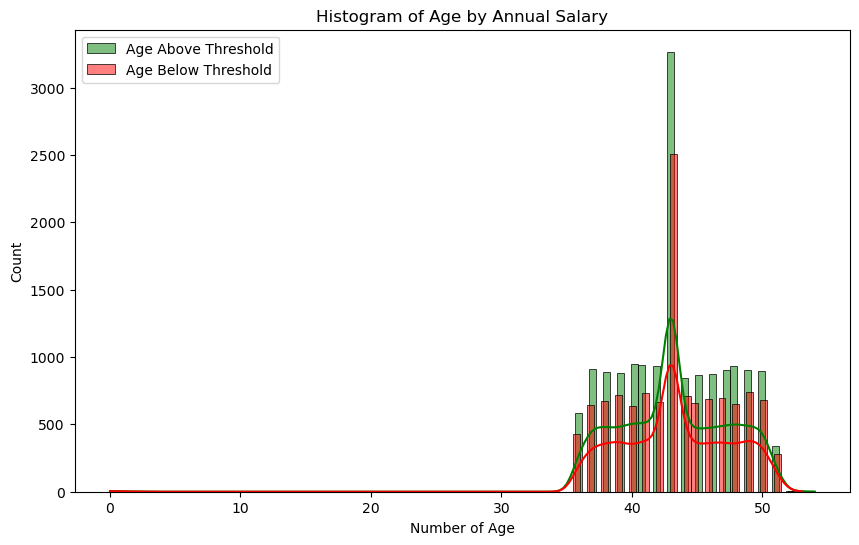

In [54]:
# Plotting histogram of Age by Annual Salary
plt.figure(figsize=(10, 6))
sns.histplot(age_above_threshold, color='green', label='Age Above Threshold', kde=True, bins=100)
sns.histplot(age_below_threshold, color='red', label='Age Below Threshold', kde=True, bins=100)
plt.legend()
plt.xlabel('Number of Age')
plt.title('Histogram of Age by Annual Salary')
plt.show()


In [55]:
# 10)
# The margin of error provides an estimate of the precision of our sample mean difference between Age for those who were above thershold for Annual Salary and those who didn’t.
# We can calculate it using the standard error and critical value (for a 95% confidence level).

import numpy as np
import scipy.stats as stats

# Calculate standard error of the mean difference
n_above_threshold = len(age_above_threshold.dropna())
n_below_threshold = len(age_below_threshold.dropna())
std_above_threshold = age_above_threshold.std()
std_below_threshold = age_below_threshold.std()

# Pooled standard deviation and margin of error
pooled_std = np.sqrt((std_above_threshold ** 2 / n_above_threshold) + (std_below_threshold** 2 / n_below_threshold))
critical_value = stats.t.ppf(1 - alpha / 2, df=n_above_threshold + n_below_threshold - 2)
margin_of_error = critical_value * pooled_std

print("Margin of Error:", margin_of_error)


# If the U-test shows a p-value below 0.05, we conclude that the difference in Age significantly Annual salary.
# The margin of error helps quantify this difference's precision. A smaller margin suggests a more precise estimate.

Margin of Error: 0.10230995447987298


Root Mean Squared Error: 4.369890869927904
Mean Squared Error: 19.09594621507925


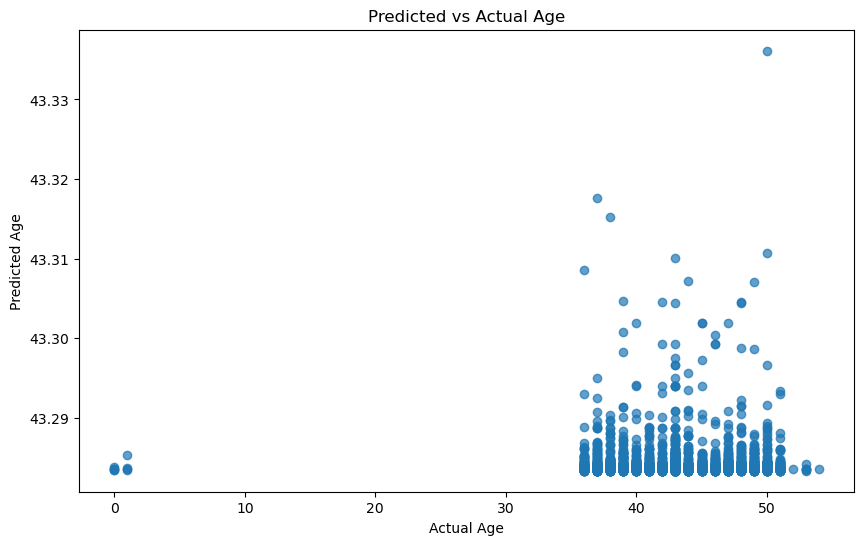

In [56]:
# 11

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target variable
features = df[['Annual salary','Additional monetary compensation']]
target = df['Age']

# Handling missing values by filling with median (basic imputation)
features = features.fillna(features.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error:", mse)

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Predicted vs Actual Age")
plt.show()

In [57]:
'''
Question 12 Answer : 
1) Total Compensation Ratio: Calculate the ratio of 'Additional Monetary Compensation' to 'Annual Salary'. This feature could reveal the proportion of 
income that comes from bonuses or additional earnings, which may correlate with age or experience level in certain industries.

Normalized Salary by Age Group: Group individuals by age ranges (e.g., 20-30, 30-40) and normalize 'Annual Salary' within these groups. 
This could help in understanding whether salaries deviate significantly within each age range, potentially reflecting career progression 
stages.
'''

"\nQuestion 12 Answer : \n1) Total Compensation Ratio: Calculate the ratio of 'Additional Monetary Compensation' to 'Annual Salary'. This feature could reveal the proportion of \nincome that comes from bonuses or additional earnings, which may correlate with age or experience level in certain industries.\n\nNormalized Salary by Age Group: Group individuals by age ranges (e.g., 20-30, 30-40) and normalize 'Annual Salary' within these groups. \nThis could help in understanding whether salaries deviate significantly within each age range, potentially reflecting career progression \nstages.\n"